<a href="https://colab.research.google.com/github/aarish7771/Linear_Algebra/blob/main/Least_Squares_Model_Fitting/Least_Squares_Application_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

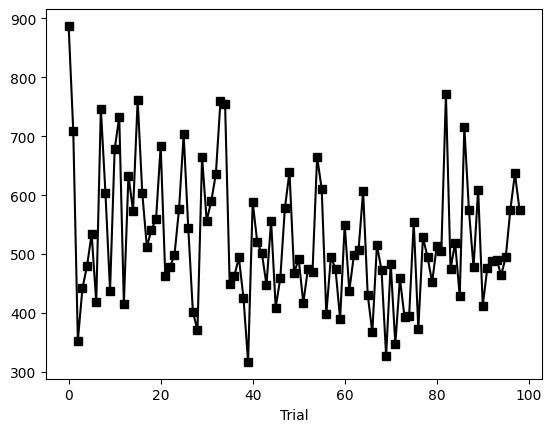

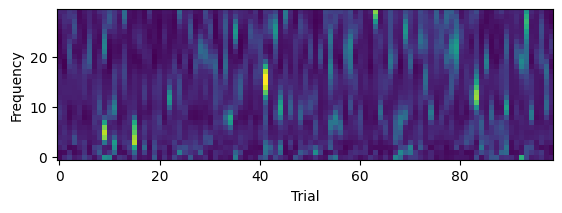

In [2]:
# load data
data = sio.loadmat('EEG_RT_data.mat')
rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)


# show the data
plt.plot(rts,'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata,origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

In [3]:
# create and fit the model for one frequency

X = np.concatenate( [np.ones([nTrials-1,1]),                   # intercept
                     np.reshape(rts[0:-1],(nTrials-1,1)),      # RTs
                     np.reshape(EEGdata[10,:-1],(nTrials-1,1)) # brain
                    ],axis=1)

b1 = np.linalg.solve(X.T@X,X.T@rts[1:])
b2 = np.linalg.lstsq(X,rts[1:],rcond=None)[0]
print(b1)
print(b2)

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


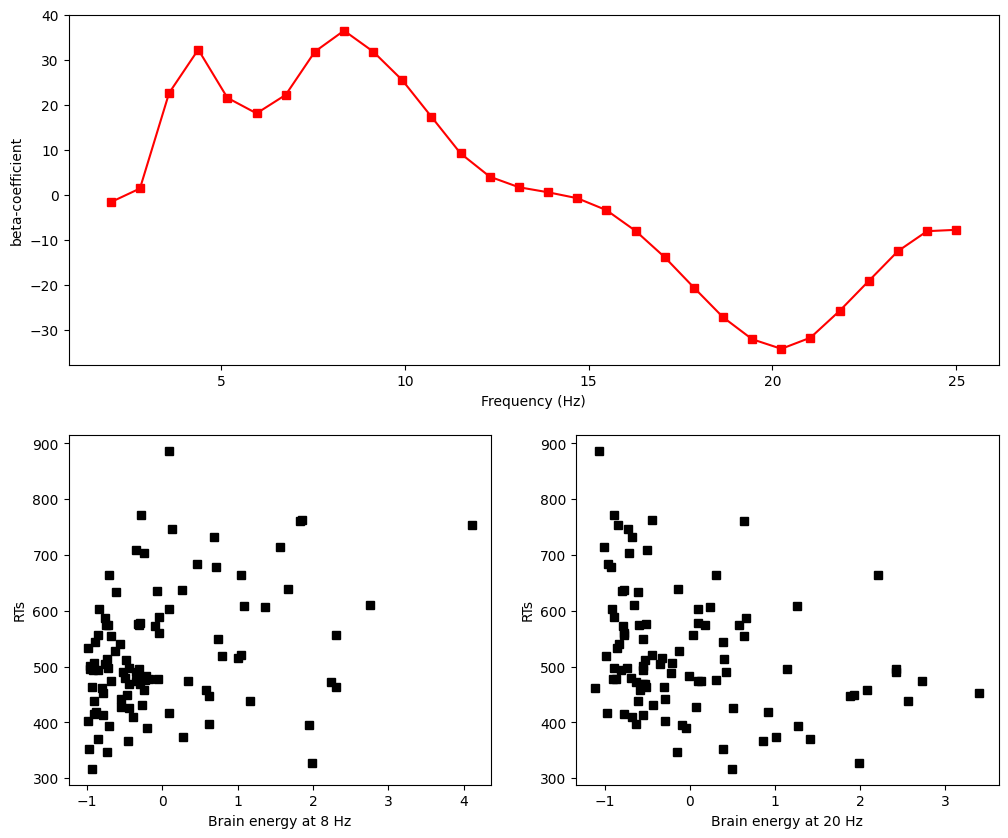

In [4]:
# initialize beta coefficients vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):

    # design matrix
    X = np.concatenate( [np.ones([nTrials,1]),                 # intercept
                         np.reshape(EEGdata[fi,:],(nTrials,1)) # brain
                        ],axis=1)

    # compute parameters
    t = np.linalg.lstsq(X,rts,rcond=None)[0]
    b[fi] = t[1]


# plots
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[8])) + ' Hz')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[23])) + ' Hz')
plt.show()
